# Crypto API Project

In [9]:
# This code was copied from CoinMarketCap and is used to test the API connection

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b54bcf4d-1bca-4e8e-9a24-22ff2c3d462c',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


{'status': {'timestamp': '2023-03-18T22:26:52.733Z', 'error_code': 0, 'error_message': None, 'elapsed': 1, 'credit_count': 1, 'notice': None}, 'data': [{'id': 683, 'name': 'qccob1wk2qb', 'symbol': '9jxfpo6p7mq', 'slug': 'vpcik6au16i', 'cmc_rank': 898, 'num_market_pairs': 7117, 'circulating_supply': 4817, 'total_supply': 3481, 'max_supply': 6082, 'last_updated': '2023-03-18T22:26:52.733Z', 'date_added': '2023-03-18T22:26:52.733Z', 'tags': ['aoinyvpzbav', 'cvr4e2f3kpn', 'n84o4wibx3g', 'wk5mldon2s', 'iam8vczjkq', '8nmxeaxio3b', 'tg0n0390i9g', 'psih9mwwvd', 'g76h2eyrj', 'teviszp3h7e'], 'platform': None, 'self_reported_circulating_supply': None, 'self_reported_market_cap': None, 'quote': {'USD': {'price': 0.814546400036291, 'volume_24h': 5408, 'volume_change_24h': 0.9377383789878022, 'percent_change_1h': 0.2630110053156556, 'percent_change_24h': 0.7769505333804747, 'percent_change_7d': 0.5503015561595843, 'market_cap': 0.6042785424350574, 'market_cap_dominance': 232, 'fully_diluted_market_c

This is now the updated code using the proper domain and not the sandbox one.
I deleted the API key (for privacy).

In [83]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '6d9cf0cc-dbd7-4cd3-bd98-b514f8d11c49',   # Paste key here
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


# This would not work if I didn't update Anaconda to allow a larger data rate limit
# In a terminal window, paste 'Jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10'

In [84]:
# Use pandas to make a DataFrame with the data collected from the API

import pandas as pd

# Allows all columns and rows to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [85]:
# Normalize the data received and display it in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10099,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19322618.00000,19322618.00000,NaN,1,NaN,NaN,None,2023-03-20T07:08:00.000Z,27774.29516,42560549798.08089,33.88720,0.37422,3.13150,23.80805,12.94942,33.24786,65.02898,536672095579.88318,46.09790,583260198342.56006,None,2023-03-20T07:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 07:09:43.520788+00:00
1,1027,Ethereum,ETH,ethereum,6595,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-03-20T07:08:00.000Z,1766.47802,10478480685.73860,18.01080,-0.13417,-0.09869,9.97208,4.27336,15.43488,45.79644,216170745467.35229,18.56590,216170745467.35001,None,2023-03-20T07:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 07:09:43.520788+00:00
2,825,Tether,USDT,tether,49741,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,76109949431.26085,79091735571.99397,NaN,3,NaN,NaN,None,2023-03-20T07:08:00.000Z,1.00320,50276506375.87892,22.57300,-0.02365,0.07632,-0.09528,0.30480,0.32056,0.30446,76353879478.26335,6.55390,79345222151.87000,None,2023-03-20T07:08:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-20 07:09:43.520788+00:00
3,1839,BNB,BNB,bnb,1217,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157891066.08469,159979963.59043,NaN,4,NaN,NaN,None,2023-03-20T07:08:00.000Z,335.05435,622696226.18199,-19.44470,-0.22113,0.26262,10.33611,5.17533,15.29700,34.54033,52902088808.14319,4.54270,53601983007.99000,None,2023-03-20T07:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 07:09:43.520788+00:00
4,3408,USD Coin,USDC,usd-coin,11015,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,36212043566.48341,36212043566.48341,NaN,5,NaN,NaN,None,2023-03-20T07:08:00.000Z,0.99997,4701510329.08265,10.95750,-0.02801,0.04297,0.87706,0.01281,-0.01257,0.00253,36210828801.76463,3.10820,36210828801.76000,None,2023-03-20T07:08:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-20 07:09:43.520788+00:00
5,52,XRP,XRP,xrp,906,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,NaN,NaN,None,2023-03-20T07:08:00.000Z,0.38277,1291736642.84646,65.57450,-0.43752,0.59324,3.78014,-3.17566,-0.45044,11.29498,19502410637.16785,1.67470,38276861999.88000,None,2023-03-20T07:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 07:09:43.520788+00:00
6,2010,Cardano,ADA,cardano,708,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34713746685.43000,35591462141.75800,NaN,7,NaN,NaN,None,2023-03-20T07:08:00.000Z,0.34202,310121538.88717,4.62840,-0.06351,0.63375,0.29206,-14.98755,2.84814,32.66136,11872726806.15058,1.01910,15390810767.80000,None,2023-03-20T07:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 07:09:43.520788+00:00
7,3890,Polygon,MATIC,polygon,620,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",10000000000.00000,8734317475.28493,10000000000.00000,NaN,8,NaN,NaN,None,2023-03-20T07:08:00.000Z,1.13515,535357330.34172,20.53900,-0.44629,-4.04292,-0.22888,-26.12070,19.90333,41.71368,9914801699.38924,0.85150,11351547190.09000,None,2023-03-20T07:08:00.000Z,NaN,NaN,NaN

In [86]:
# Make function to run the API 

def api_runner():
    global df # A dataframe was already made
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '6d9cf0cc-dbd7-4cd3-bd98-b514f8d11c49',   # Paste key here
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    # Make a dataframe to save new data in and append to original data frame
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    
    
    
    # Uncomment below if writing to csv is prefered:
    
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now', utc=True)
    #df
    
    
    # Check if csv file has been made. If it has been created before, appends the new data to existing csv file.
    #if not os.path.isfile(r'/Users/davester/Documents/Projects/CryptoAPI.csv'):
    #    df.to_csv(r'/Users/davester/Documents/Projects/CryptoAPI.csv', header='column_names')
    #else:
    #    df.to_csv(r'/Users/davester/Documents/Projects/CryptoAPI.csv', mode='a', header=False
    

In [87]:
import os
from time import time
from time import sleep

# for loop to call api_runner the number of times in range() 
# while waiting the amount of time in sleep() between each loop

for i in range(100):
    api_runner()
    print('API Runner completed successfully')
    sleep(60)
exit()

/Users/davester/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/k_/y9mvbgr51nx4jcpq7gfpzb_h0000gp/T/ipykernel_50698/505507939.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


/Users/davester/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/k_/y9mvbgr51nx4jcpq7gfpzb_h0000gp/T/ipykernel_50698/505507939.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


/Users/davester/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/k_/y9mvbgr51nx4jcpq7gfpzb_h0000gp/T/ipykernel_50698/505507939.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


/Users/davester/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/k_/y9mvbgr51nx4jcpq7gfpzb_h0000gp/T/ipykernel_50698/505507939.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


/Users/davester/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/k_/y9mvbgr51nx4jcpq7gfpzb_h0000gp/T/ipykernel_50698/505507939.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


/Users/davester/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/k_/y9mvbgr51nx4jcpq7gfpzb_h0000gp/T/ipykernel_50698/505507939.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


/Users/davester/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/k_/y9mvbgr51nx4jcpq7gfpzb_h0000gp/T/ipykernel_50698/505507939.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


KeyboardInterrupt: 

In [ ]:
# If using csv, uncomment below:

#df_csv = pd.read_csv(r'/Users/davester/Documents/Projects/CryptoAPI.csv')
#df_csv

In [88]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10099,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19322618.00000,19322618.00000,NaN,1,NaN,NaN,None,2023-03-20T07:08:00.000Z,27774.29516,42560549798.08089,33.88720,0.37422,3.13150,23.80805,12.94942,33.24786,65.02898,536672095579.88318,46.09790,583260198342.56006,None,2023-03-20T07:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 07:09:43.520788+00:00,NaT
1,1027,Ethereum,ETH,ethereum,6595,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-03-20T07:08:00.000Z,1766.47802,10478480685.73860,18.01080,-0.13417,-0.09869,9.97208,4.27336,15.43488,45.79644,216170745467.35229,18.56590,216170745467.35001,None,2023-03-20T07:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 07:09:43.520788+00:00,NaT
2,825,Tether,USDT,tether,49741,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,76109949431.26085,79091735571.99397,NaN,3,NaN,NaN,None,2023-03-20T07:08:00.000Z,1.00320,50276506375.87892,22.57300,-0.02365,0.07632,-0.09528,0.30480,0.32056,0.30446,76353879478.26335,6.55390,79345222151.87000,None,2023-03-20T07:08:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-20 07:09:43.520788+00:00,NaT
3,1839,BNB,BNB,bnb,1217,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157891066.08469,159979963.59043,NaN,4,NaN,NaN,None,2023-03-20T07:08:00.000Z,335.05435,622696226.18199,-19.44470,-0.22113,0.26262,10.33611,5.17533,15.29700,34.54033,52902088808.14319,4.54270,53601983007.99000,None,2023-03-20T07:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 07:09:43.520788+00:00,NaT
4,3408,USD Coin,USDC,usd-coin,11015,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,36212043566.48341,36212043566.48341,NaN,5,NaN,NaN,None,2023-03-20T07:08:00.000Z,0.99997,4701510329.08265,10.95750,-0.02801,0.04297,0.87706,0.01281,-0.01257,0.00253,36210828801.76463,3.10820,36210828801.76000,None,2023-03-20T07:08:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-20 07:09:43.520788+00:00,NaT
5,52,XRP,XRP,xrp,906,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,NaN,NaN,None,2023-03-20T07:08:00.000Z,0.38277,1291736642.84646,65.57450,-0.43752,0.59324,3.78014,-3.17566,-0.45044,11.29498,19502410637.16785,1.67470,38276861999.88000,None,2023-03-20T07:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 07:09:43.520788+00:00,NaT
6,2010,Cardano,ADA,cardano,708,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34713746685.43000,35591462141.75800,NaN,7,NaN,NaN,None,2023-03-20T07:08:00.000Z,0.34202,310121538.88717,4.62840,-0.06351,0.63375,0.29206,-14.98755,2.84814,32.66136,11872726806.15058,1.01910,15390810767.80000,None,2023-03-20T07:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 07:09:43.520788+00:00,NaT
7,3890,Polygon,MATIC,polygon,620,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",10000000000.00000,8734317475.28493,10000000000.00000,NaN,8,NaN,NaN,None,2023-03-20T07:08:00.000Z,1.13515,535357330.34172,20.53900,-0.44629,-4.04292,-0.22888,-26.12070,19.90333,41.71368,9914801699.38924,0.85150,11351547190.09000,Non

In [89]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [90]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10099,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19322618.00000,19322618.00000,NaN,1,NaN,NaN,None,2023-03-20T07:08:00.000Z,27774.29516,42560549798.08089,33.88720,0.37422,3.13150,23.80805,12.94942,33.24786,65.02898,536672095579.88318,46.09790,583260198342.56006,None,2023-03-20T07:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 07:09:43.520788+00:00,NaT
1,1027,Ethereum,ETH,ethereum,6595,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-03-20T07:08:00.000Z,1766.47802,10478480685.73860,18.01080,-0.13417,-0.09869,9.97208,4.27336,15.43488,45.79644,216170745467.35229,18.56590,216170745467.35001,None,2023-03-20T07:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 07:09:43.520788+00:00,NaT
2,825,Tether,USDT,tether,49741,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,76109949431.26085,79091735571.99397,NaN,3,NaN,NaN,None,2023-03-20T07:08:00.000Z,1.00320,50276506375.87892,22.57300,-0.02365,0.07632,-0.09528,0.30480,0.32056,0.30446,76353879478.26335,6.55390,79345222151.87000,None,2023-03-20T07:08:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-20 07:09:43.520788+00:00,NaT
3,1839,BNB,BNB,bnb,1217,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157891066.08469,159979963.59043,NaN,4,NaN,NaN,None,2023-03-20T07:08:00.000Z,335.05435,622696226.18199,-19.44470,-0.22113,0.26262,10.33611,5.17533,15.29700,34.54033,52902088808.14319,4.54270,53601983007.99000,None,2023-03-20T07:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 07:09:43.520788+00:00,NaT
4,3408,USD Coin,USDC,usd-coin,11015,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,36212043566.48341,36212043566.48341,NaN,5,NaN,NaN,None,2023-03-20T07:08:00.000Z,0.99997,4701510329.08265,10.95750,-0.02801,0.04297,0.87706,0.01281,-0.01257,0.00253,36210828801.76463,3.10820,36210828801.76000,None,2023-03-20T07:08:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-20 07:09:43.520788+00:00,NaT


# Aggregations

In [91]:
# Making a new dataframe where we group by the name of the crypto and take the average of a few columns

df_mean = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df_mean.head()

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.37422,3.13150,23.80805,12.94942,33.24786,65.02898
Ethereum,-0.13417,-0.09869,9.97208,4.27336,15.43488,45.79644
Tether,-0.02365,0.07632,-0.09528,0.30480,0.32056,0.30446
BNB,-0.22113,0.26262,10.33611,5.17533,15.29700,34.54033
USD Coin,-0.02801,0.04297,0.87706,0.01281,-0.01257,0.00253


In [92]:
# New data frame where we pivot the previous data frame using .stack()

df2 = df_mean.stack()
df2

name                                     
Bitcoin      quote.USD.percent_change_1h      0.37422
             quote.USD.percent_change_24h     3.13150
             quote.USD.percent_change_7d     23.80805
             quote.USD.percent_change_30d    12.94942
             quote.USD.percent_change_60d    33.24786
             quote.USD.percent_change_90d    65.02898
Ethereum     quote.USD.percent_change_1h     -0.13417
             quote.USD.percent_change_24h    -0.09869
             quote.USD.percent_change_7d      9.97208
             quote.USD.percent_change_30d     4.27336
             quote.USD.percent_change_60d    15.43488
             quote.USD.percent_change_90d    45.79644
Tether       quote.USD.percent_change_1h     -0.02365
             quote.USD.percent_change_24h     0.07632
             quote.USD.percent_change_7d     -0.09528
             quote.USD.percent_change_30d     0.30480
             quote.USD.percent_change_60d     0.32056
             quote.USD.percent_change_90

In [93]:
# Using stack changes the data frame into a series, this will change it back

df2 = df2.to_frame(name='values')
df2

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.37422
            quote.USD.percent_change_24h   3.13150
            quote.USD.percent_change_7d   23.80805
            quote.USD.percent_change_30d  12.94942
            quote.USD.percent_change_60d  33.24786
            quote.USD.percent_change_90d  65.02898
Ethereum    quote.USD.percent_change_1h   -0.13417
            quote.USD.percent_change_24h  -0.09869
            quote.USD.percent_change_7d    9.97208
            quote.USD.percent_change_30d   4.27336
            quote.USD.percent_change_60d  15.43488
            quote.USD.percent_change_90d  45.79644
Tether      quote.USD.percent_change_1h   -0.02365
            quote.USD.percent_change_24h   0.07632
            quote.USD.percent_change_7d   -0.09528
            quote.USD.percent_change_30d   0.30480
            quote.USD.percent_change_60d   0.32056
            quote.USD.percent_change_90d   0.30446
BNB         quote.USD.percent_change_1h   -0.22113
            quote.USD.percent_change_24h   0.26262
            quote.USD.percent_change_7d   10.33611
            quote.USD.percent_change_30d   5.17533
            quote.USD.percent_change_60d  15.29700
            quote.USD.percent_change_90d  34.54033
USD Coin    quote.USD.percent_change_1h   -0.02801
            quote.USD.percent_change_24h   0.04297
            quote.USD.percent_change_7d    0.87706
            quote.USD.percent_change_30d   0.01281
            quote.USD.percent_change_60d  -0.01257
            quote.USD.percent_change_90d   0.00253
XRP         quote.USD.percent_change_1h   -0.43752
            quote.USD.percent_change_24h   0.59324
            quote.USD.percent_change_7d    3.78014
            quote.USD.percent_change_30d  -3.17566
            quote.USD.percent_change_60d  -0.45044
            quote.USD.percent_change_90d  11.29498
Cardano     quote.USD.percent_change_1h   -0.06351
            quote.USD.percent_change_24h   0.63375
            quote.USD.percent_change_7d    0.29206
            quote.USD.percent_change_30d -14.98755
            quote.USD.percent_change_60d   2.84814
            quote.USD.percent_change_90d  32.66136
Polygon     quote.USD.percent_change_1h   -0.44629
            quote.USD.percent_change_24h  -4.04292
            quote.USD.percent_change_7d   -0.22888
            quote.USD.percent_change_30d -26.12070
            quote.USD.percent_change_60d  19.90333
            quote.USD.percent_change_90d  41.71368
Dogecoin    quote.USD.percent_change_1h   -0.15521
            quote.USD.percent_change_24h  -0.22786
            quote.USD.percent_change_7d    4.52704
            quote.USD.percent_change_30d -15.80024
            quote.USD.percent_change_60d  -8.62989
            quote.USD.percent_change_90d  -0.99377
Solana      quote.USD.percent_change_1h   -0.86243
            quote.USD.percent_change_24h   3.55569
            quote.USD.percent_change_7d   12.52236
            quote.USD.percent_change_30d  -4.56520
            quote.USD.percent_change_60d   3.94981
            quote.USD.percent_change_90d  79.90159
Binance USD quote.USD.percent_change_1h    0.02493
            quote.USD.percent_change_24h   0.04713
            quote.USD.percent_change_7d   -0.14399
            quote.USD.percent_change_30d   0.03192
            quote.USD.percent_change_60d  -0.00264
            quote.USD.percent_change_90d   0.00822
Polkadot    quote.USD.percent_change_1h   -0.21745
            quote.USD.percent_change_24h  -0.68315
            quote.USD.percent_change_7d    6.96129
            quote.USD.percent_change_30d -12.61058
            quote.USD.percent_change_60d  10.18202
            quote.USD.percent_change_90d  37.46596
Shiba Inu   quote.USD.percent_change_1h   -0.18912
            quote.USD.percent_change_24h  -0.60037
            quote.USD.percent_change_7d   -1.24829
            quote.USD.percent_change_30d -18.91219
            quote.USD.percent_change_60d  -3.57327
            quo

In [94]:
# Reset the index of df2 since it currently has the 'name' as the index

df2 = df2.reset_index()
df2.head()

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.37422
1,Bitcoin,quote.USD.percent_change_24h,3.13150
2,Bitcoin,quote.USD.percent_change_7d,23.80805
3,Bitcoin,quote.USD.percent_change_30d,12.94942
4,Bitcoin,quote.USD.percent_change_60d,33.24786


In [95]:
# Change the column name for 'level_1' to percent _change

df2 = df2.rename(columns = {'level_1': 'percent_change'})
df2

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.37422
1,Bitcoin,quote.USD.percent_change_24h,3.13150
2,Bitcoin,quote.USD.percent_change_7d,23.80805
3,Bitcoin,quote.USD.percent_change_30d,12.94942
4,Bitcoin,quote.USD.percent_change_60d,33.24786
5,Bitcoin,quote.USD.percent_change_90d,65.02898
6,Ethereum,quote.USD.percent_change_1h,-0.13417
7,Ethereum,quote.USD.percent_change_24h,-0.09869
8,Ethereum,quote.USD.percent_change_7d,9.97208
9,Ethereum,quote.USD.percent_change_30d,4.27336


In [99]:
# Change the names of the values in percent_change column

df2['percent_change'] = df2['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])


# Visualization

After all the manipulation on df2, we can now to start to visualize the data

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
sns.catplot(x='percent_change', y='values', hue='name', data=df2, kind='point')

<Figure size 640x480 with 0 Axes>

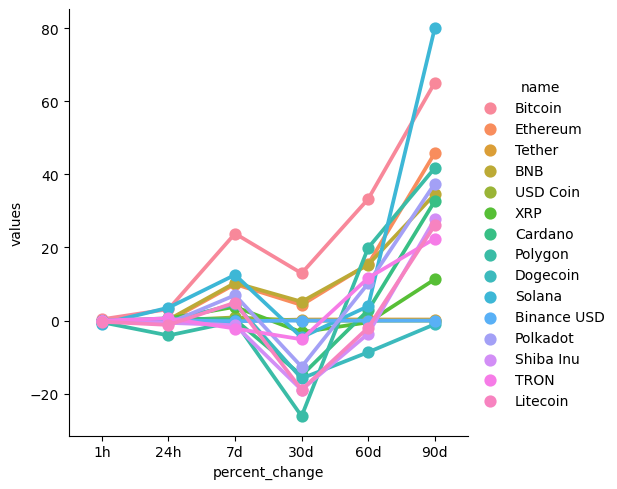

In [102]:
plt.show()

In [107]:
df3 = df[['name', 'quote.USD.price', 'timestamp']]
df3 = df3.query('name == "Bitcoin"')
df3

,name,quote.USD.price,timestamp
0,Bitcoin,27774.29516,2023-03-20 07:09:43.520788+00:00
1,Ethereum,1766.47802,2023-03-20 07:09:43.520788+00:00
2,Tether,1.00320,2023-03-20 07:09:43.520788+00:00
3,BNB,335.05435,2023-03-20 07:09:43.520788+00:00
4,USD Coin,0.99997,2023-03-20 07:09:43.520788+00:00
5,XRP,0.38277,2023-03-20 07:09:43.520788+00:00
6,Cardano,0.34202,2023-03-20 07:09:43.520788+00:00
7,Polygon,1.13515,2023-03-20 07:09:43.520788+00:00
8,Dogecoin,0.07402,2023-03-20 07:09:43.520788+00:00
9,Solana,22.25073,2023-03-20 07:09:43.520788+00:00


In [108]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp', y='quote.USD.price', data=df3)

<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

In [112]:
plt.show()